## Análisis factorial
El análisis factorial es una técnica de aprendizaje no supervisado de reducción de dimensionalidad.

Análisis factorial es una técnica estadística de reducción de datos usada para explicar las correlaciones entre las variables observadas en términos de un número menor de variables no observadas llamadas factores.

- Las variables observadas se modelan como combinaciones lineales de factores más expresiones de error.
- Idea: La información obtenida sobre las interdependencias entre las variables observadas se puede utilizar para reducir el número de variables.
- Es un modelo lineal

### Proceso
El principal objetivo del análisis factorial es:

- Reducir el número de variables observadas.
- Encontrar variables latentes.

Para pasar de variables observadas a variables latentes hay que seguir los siguientes pasos:

1. __Extracción de los factores__. Se extraen los factores, usando por ejemplo PCA.
2. __Rotación de los factores__. Se convierten los factores en factores no correlados, con el objetivo de mejorar la interpretabilidad. Existen diferentes métodos de rotación, como Varimax, Quartimax and Promax.

### Terminología
- __Factores__: variables no observadas que describen la relación entre variables observadas.
    - El número máximo de factores es el número total de variables observadas.
    - Cada factor explica una varianza en las variables observadas.
    - Los factores que explican menos varianza se suelen desechar.
    
- __Cargas__: Correlación entre una variable y un factor dados. Indica en qué medida ambos están relacionados.

- __Comunalidades__: Suma del cuadrado de las cargas de cada variable. Representa la varianza total.
    - Toma valores de __0__ a __1__, donde valores más grandes indican mayor varianza.

- Rotación de factores: Herramienta para mejorar la interpretabilidad.
    - La rotación puede ser ortogonal u oblícua.

### ¿Es adecuado un dataset para FA?
Antes de aplicar FA a un dataset, hay que mirar si se puede factorizar, es decir si se pueden encontrar factores. Hay dos métodos para ello:

- __Bartlett’s Test__:

  - Mira si las variables están suficientemente correladas para aplicar FA.
  - Compara la matriz de correlaciones a la identidad.
  - P-value: Si es menor que __0.05__, se considera que ambas matrices no se parecen, por lo tanto que hay correlación y el FA es adecuado.
  - Chi-cuadrado: Testing statistic

- __Kaiser-Meyer-Olkin Test o KMO__:

  - Estima la proporción de la varianza sobre todas las variables observadas.
  - Toma valores entre __0__ y __1__; Cuanto más altos mejor.
  - En general:
    - 0.8 o más: muy bueno
    - 0.7–0.8: bueno
    - 0.6–0.7: mediocre
    - Menor que 0.6: No se recomienda aplicar FA.

### Elegir el número de factores
Las dos técnicas más comunes para determinar el número de factores son:

1. Método gráfico: Representar gráficamente los autovalores de los factores y usar el elbow method.
2. Método analítico: Se seleccionan los factores de mayor autovalor, generalmente aquéllos de autovalor mayor que 1.

### Análisis factorial vs PCA
- Las componentes principales explican la mayor cantidad de varianza, mientras que el análisis factorial la covarianza.
- Las componentes principales son ortogonales, mientras que el análisis factorial no produce factores ortogonales.
- Una componente principal es una combinación lineal de las variables observadas, mientras que las variables observadas son combinaciones lineales de los factores latentes.

## Implementación
Vamos a implementar FA en BFI, un dataset basado en un test de personalidad. Disponible en https://vincentarelbundock.github.io/Rdatasets/datasets.html

Las respuestas están en una escala del 1 al 6:

- 1 Very Inaccurate
- 2 Moderately Inaccurate
- 3 Slightly Inaccurate
- 4 Slightly Accurate
- 5 Moderately Accurate
- 6 Very Accurate

Seguimos los siguientes pasos:

1. Cargar y limpiar los datos.
2. Tests de adecuación.
3. Elegir el número de factores.
4. Calcular los factores.
5. Calcular las cargas de cada variable observada.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("bfi.csv")
df.head()

,rownames,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [3]:
# Dropping unnecessary columns
df.drop(['rownames', 'gender', 'education', 'age'],axis=1,inplace=True)

In [4]:
# Dropping missing values rows
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  O3   

In [6]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(np.float64(18146.06557723503), np.float64(0.0))

In [7]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

print(kmo_model)

0.8486452309468397


In [8]:
from factor_analyzer import FactorAnalyzer

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

c:\Users\Jaime Cremades\anaconda3\envs\aprendizajecd\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

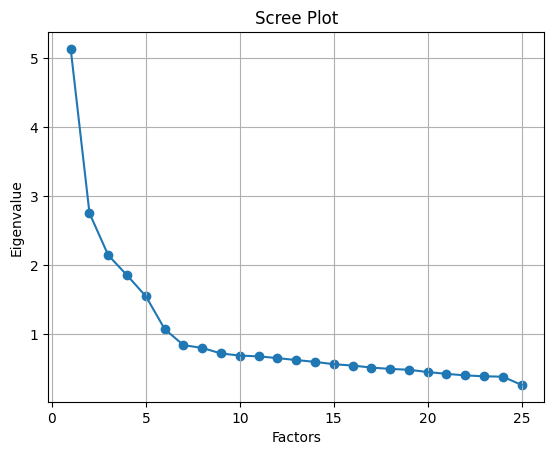

In [9]:
# Create scree plot
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [10]:
fa = FactorAnalyzer(n_factors=6, rotation="varimax")

fa.fit(df)

c:\Users\Jaime Cremades\anaconda3\envs\aprendizajecd\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,n_factors,6
,rotation,'varimax'
,method,'minres'
,use_smc,True
,is_corr_matrix,False
,bounds,"(0.005, ...)"
,impute,'median'
,svd_method,'randomized'
,rotation_kwargs,{}


In [11]:
fa.loadings_

array([[ 9.52197424e-02,  4.07831574e-02,  4.87338852e-02,
        -5.30987347e-01, -1.13057329e-01,  1.61216352e-01],
       [ 3.31312762e-02,  2.35538039e-01,  1.33714394e-01,
         6.61140977e-01,  6.37337876e-02, -6.24353774e-03],
       [-9.62088413e-03,  3.43008173e-01,  1.21353367e-01,
         6.05932694e-01,  3.39902665e-02,  1.60106427e-01],
       [-8.15175586e-02,  2.19716720e-01,  2.35139532e-01,
         4.04594040e-01, -1.25338019e-01,  8.63557034e-02],
       [-1.49615885e-01,  4.14457673e-01,  1.06382165e-01,
         4.69698292e-01,  3.09765737e-02,  2.36519343e-01],
       [-4.35840242e-03,  7.72477524e-02,  5.54582254e-01,
         7.51069621e-03,  1.90123730e-01,  9.50350450e-02],
       [ 6.83300835e-02,  3.83703838e-02,  6.74545450e-01,
         5.70549877e-02,  8.75925922e-02,  1.52775078e-01],
       [-3.99936734e-02,  3.18673004e-02,  5.51164439e-01,
         1.01282241e-01, -1.13380872e-02,  8.99628354e-03],
       [ 2.16283366e-01, -6.62407737e-02, -6.384

In [12]:
loadings_df = pd.DataFrame(data=fa.loadings_, 
             index=df.columns)

loadings_df

,0,1,2,3,4,5
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


- Factor 0: cargas altas para N1,N2,N3,N4, and N5 (Neuroticism)
- Factor 1: cargas altas para E1,E2,E3,E4, and E5 (Extraversion)
- Factor 2: cargas altas para C1,C2,C3,C4, and C5 (Conscientiousness)
- Factor 3: cargas altas para A1,A2,A3,A4, and A5 (Agreeableness)
- Factor 4: cargas altas para O1,O2,O3,O4, and O5 (Opennness)
- Factor 5: no tiene ninguna carga muy alta, por lo tanto no es muy interpretable. Sería mejor en este caso hacer el análisis de factores con sólo 5 factores.

In [13]:
# Varianza de cada factor
# Información de la varianza de los factores, incluyendo la varianza, la varianza proporcional y la varianza acumulada para cada factor
fa.get_factor_variance()

(array([2.7269887 , 2.602239  , 2.07347064, 1.7134991 , 1.50483135,
        0.63029714]),
 array([0.10907955, 0.10408956, 0.08293883, 0.06853996, 0.06019325,
        0.02521189]),
 array([0.10907955, 0.21316911, 0.29610793, 0.3646479 , 0.42484115,
        0.45005304]))

## Ventajas y limitaciones
### Ventajas
- Reducción de los datos: Puede reducir un gran número de variables observadas en un número más reducido de factores, lo que simplifica el análisis.
- Identifica la estructura: Revela relaciones subyacientes o construcciones latentes entre variables.
- Mejora la interpretabilidad al simplificar un dataset complejo agrupando variables correladas.
- Elimina la multicolinealidad.
### Limitaciones
- Requiere la elección del número de facores y del método de rotación.
- Necesita bastantes datos para producir resultados estables.
- Asume que las relaciones entre las variables son lineales, lo cual no es siempre cierto.
- Sensible a outliers.
### Cuándo usar FA
- Contraste de hipótesis.